In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/testnotes/test.png
/kaggle/input/music-notes-datasets/data1.csv
/kaggle/input/music-notes-datasets/dataset.csv
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s700.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s524.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s990.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s939.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s604.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s418.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s272.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s176.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s67.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s419.jpg
/kaggle/input/music-notes-datasets/datasets/datasets/Notes/Sixteenth/s402.jpg
/kaggle/input/musi

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import os

2024-06-22 16:15:09.032250: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 16:15:09.032391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 16:15:09.178563: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Veri Seti Seçimi**

In [3]:
# Veri yolu
data_dir = '../input/music-notes-datasets/datasets/datasets/Notes'

# ImageDataGenerator ile veri artırma
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Eğitim ve doğrulama veri setleri
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


**Veri Ön İşleme**

X_train shape: (4000, 64, 64, 3)
y_train shape: (4000, 5)
X_test shape: (992, 64, 64, 3)
y_test shape: (992, 5)
Sample image shape: (64, 64, 3)


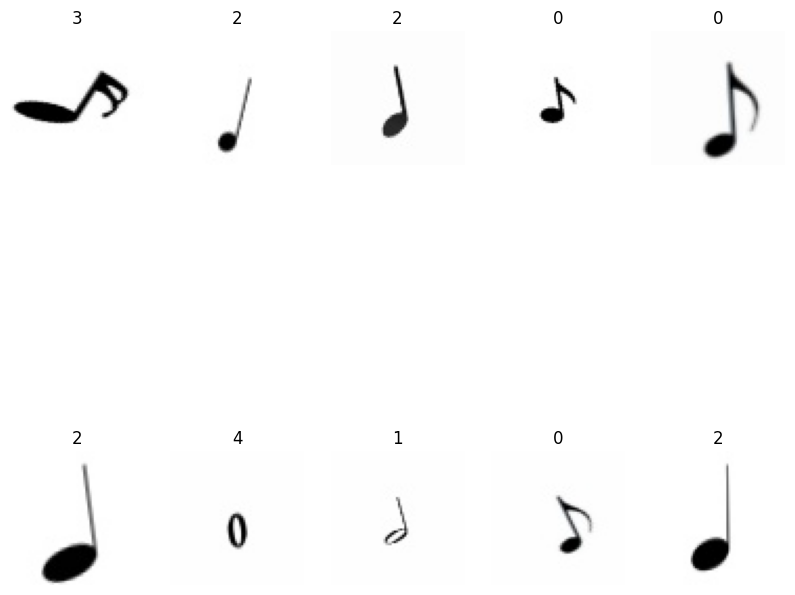

In [4]:
# Verileri X_train, y_train, X_test ve y_test olarak bölelim
X_train, y_train = [], []
X_test, y_test = [], []

for _ in range(train_generator.samples // train_generator.batch_size):
    img, label = next(train_generator)
    X_train.extend(img)
    y_train.extend(label)

for _ in range(validation_generator.samples // validation_generator.batch_size):
    img, label = next(validation_generator)
    X_test.extend(img)
    y_test.extend(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Boyutları yazdırma
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Görüntülerin boyutlarını yazdırma
print("Sample image shape:", X_train[0].shape)

# 10 görüntüyü görselleştirme
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(np.argmax(y_train[i]))
    plt.axis('off')
plt.show()

# Verileri normalize etme
X_train = X_train / 255.0
X_test = X_test / 255.0

**CNN Modeli Oluşturma ve Derleme**

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model tanımı
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Model derleme
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Model Eğitimi**

In [6]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.4603 - loss: 1.2453 - val_accuracy: 0.8900 - val_loss: 0.2781
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 114ms/step - accuracy: 0.9202 - loss: 0.2226 - val_accuracy: 0.9160 - val_loss: 0.2068
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.9740 - loss: 0.0860 - val_accuracy: 0.9130 - val_loss: 0.2328
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9774 - loss: 0.0569 - val_accuracy: 0.9640 - val_loss: 0.0871
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.9950 - loss: 0.0258 - val_accuracy: 0.8960 - val_loss: 0.3755
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 146ms/step - accuracy: 0.9894 - loss: 0.0329 - val_accuracy: 0.9590 - val_loss: 0.1257
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.9958 - loss: 0.0158 - val_accuracy: 0.9380 - val_loss: 0.2222
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 204ms/step - accuracy: 0.9942 - loss: 0.0184 - val

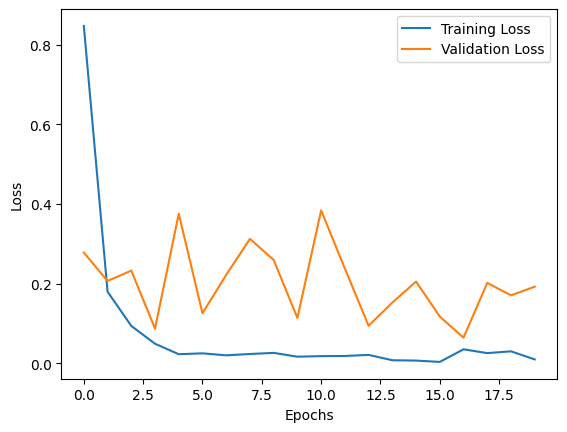

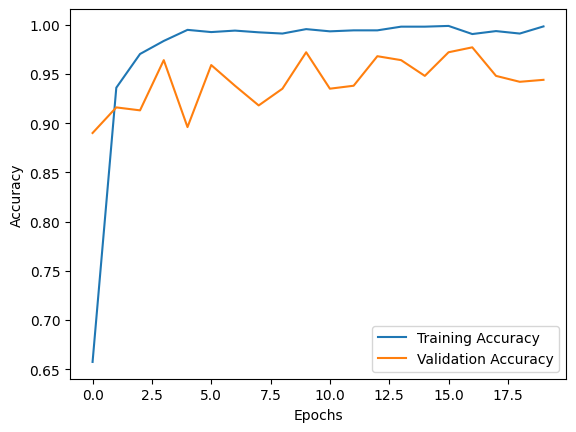

In [7]:
# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Doğrulama veri seti üzerinde modelin performansı**

In [8]:
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9390 - loss: 0.2116
Validation Loss: 0.19244995713233948
Validation Accuracy: 0.9440000057220459


**Modeli Kaydet******

In [9]:
try:
    model.save('music_note_classifier.h5')
    print("Model kaydedildi: music_note_classifier.h5")
except Exception as e:
    print("Model kaydedilirken bir hata oluştu:", e)


Model kaydedildi: music_note_classifier.h5


**Modeli Yükle**

In [10]:
from tensorflow.keras.models import load_model

try:
    model = load_model('/kaggle/working/music_note_classifier.h5')
    print("Model yüklendi: music_note_classifier.h5")
except Exception as e:
    print("Model yüklenirken bir hata oluştu:", e)


Model yüklendi: music_note_classifier.h5


In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(64, 64))  # Modelin giriş boyutu
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Modelin beklediği şekle getirin
    img_array /= 255.0  # Normalizasyon
    return img_array

def predict_image(model, img_path):
    img_array = prepare_image(img_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)
    return class_idx

In [12]:
class_labels = list(train_generator.class_indices.keys())

def get_class_label(class_idx):
    return class_labels[class_idx[0]]

**Sonuç, Test**

In [13]:
img_path = '/kaggle/input/testnotes/test.png'
class_idx = predict_image(model, img_path)
class_label = get_class_label(class_idx)

print(f'The predicted class is: {class_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
The predicted class is: Whole
